In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
# import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from anndata import AnnData
import scipy.sparse as sp
import anndata as ad
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

sample_ids = [f"{i:03d}" for i in range(1, 19)]

# List to store individual adatas
adatas = []
adata_dict = {}
spatial_dict = {}

# Loop through each sample
for sid in tqdm(sample_ids):
    sample_id = f"IMMUNEX{sid}"
    path = f"/scratch/Projects/IMMUNEX/segmentation/bin2cell/bin2cell_output_he0.01_gex0.05/{sample_id}/adata_processed.h5ad"
    
    if os.path.exists(path):
        adata_sample = sc.read(path)
        adata_sample.var_names_make_unique()
        adata_sample.raw = adata_sample
        adata_sample.uns['sample_id'] = sample_id
        adata_sample.obs['sample_id'] = sample_id  # Add sample ID to obs for tracking
        display(adata_sample.obs.head())

        # Count total UMIs per bin
        adata_sample.obs['n_counts'] = np.array(adata_sample.X.sum(axis=1)).flatten()
        # Count number of genes per bin
        adata_sample.obs['n_genes'] = np.array((adata_sample.X > 0).sum(axis=1)).flatten()

        
        # Save .uns['spatial'] if it exists
        if 'spatial' in adata_sample.uns:
            spatial_dict[sample_id] = adata_sample.uns['spatial']
            
        adata_dict[sample_id] = adata_sample

        # adatas.append(adata_sample)
    else:
        print(f"File not found for sample {sample_id}: {path}")


for sid in tqdm(adata.uns['spatial']):
    nested_key = list(adata.uns['spatial'][sid].keys())[0]  # e.g., 'Visium_NSCLC_IMMUNEX018'
    adata.uns['spatial'][sid] = adata.uns['spatial'][sid][nested_key]
    
# Concatenate all samples into one AnnData object
# adata = ad.concat(adatas, label='batch', keys=sample_ids, index_unique='-')
adata = ad.concat(adata_dict, label='sample_id', merge='unique')
adata.uns['spatial'] = spatial_dict

adata.obs.sample(5)

  0%|                                                                                                                                                                                                                         | 0/18 [00:00<?, ?it/s]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_02587_02503-1,1,2587,2503,16.0,0.369561,12.195529,244255,244255,46318,244255,primary,IMMUNEX001
s_002um_01674_00710-1,1,1674,710,5.0,0.368149,12.148933,0,182968,38750,182968,primary,IMMUNEX001
s_002um_02498_02808-1,1,2498,2808,6.0,0.321744,10.617562,223302,223302,0,223302,primary,IMMUNEX001
s_002um_00952_00136-1,1,952,136,9.0,0.706108,23.301573,0,0,19287,0,none,IMMUNEX001
s_002um_00564_00910-1,1,564,910,1.0,0.091521,3.020180,0,0,0,0,none,IMMUNEX001


  6%|███████████▌                                                                                                                                                                                                     | 1/18 [00:19<05:31, 19.50s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_02587_02503-1,1,2587,2503,28.0,0.823529,21.411765,0,123152,22606,123152,primary,IMMUNEX002
s_002um_01674_00710-1,1,1674,710,2.0,0.233977,6.083413,0,168030,34839,168030,primary,IMMUNEX002
s_002um_02498_02808-1,1,2498,2808,4.0,0.315715,8.208591,119256,119256,0,119256,primary,IMMUNEX002
s_002um_00952_00136-1,1,952,136,1.0,0.143678,3.735632,330594,330594,0,330594,primary,IMMUNEX002
s_002um_00564_00910-1,1,564,910,5.0,0.528161,13.732175,0,291153,0,291153,primary,IMMUNEX002


 11%|███████████████████████▏                                                                                                                                                                                         | 2/18 [00:38<05:11, 19.47s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,2.0,0.089304,3.572158,479018,479018,0,479018,primary,IMMUNEX003
s_002um_02587_02503-1,1,2587,2503,5.0,0.191345,7.653803,0,155229,0,155229,primary,IMMUNEX003
s_002um_01674_00710-1,1,1674,710,2.0,0.090652,3.626080,0,181650,0,181650,primary,IMMUNEX003
s_002um_02498_02808-1,1,2498,2808,8.0,0.501836,20.073445,145701,145701,28593,145701,primary,IMMUNEX003
s_002um_00952_00136-1,1,952,136,17.0,0.503782,20.151270,0,433134,63367,433134,primary,IMMUNEX003


 17%|██████████████████████████████████▊                                                                                                                                                                              | 3/18 [00:59<04:59, 19.97s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,1.0,0.156250,1.562500,0,0,0,0,none,IMMUNEX004
s_002um_02587_02503-1,1,2587,2503,3.0,0.366667,3.666667,91738,91738,35867,91738,primary,IMMUNEX004
s_002um_02498_02808-1,1,2498,2808,1.0,0.171875,1.718750,0,73758,0,73758,primary,IMMUNEX004
s_002um_00952_00136-1,1,952,136,3.0,0.274108,2.741080,229634,229634,74762,229634,primary,IMMUNEX004
s_002um_00564_00910-1,1,564,910,3.0,0.500000,5.000000,0,0,80994,0,none,IMMUNEX004


 22%|██████████████████████████████████████████████▍                                                                                                                                                                  | 4/18 [01:15<04:17, 18.41s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,4.0,0.234626,6.569514,0,381346,0,381346,primary,IMMUNEX005
s_002um_02587_02503-1,1,2587,2503,4.0,0.244253,6.839080,0,131751,0,131751,primary,IMMUNEX005
s_002um_01674_00710-1,1,1674,710,4.0,0.318646,8.922075,0,184452,0,184452,primary,IMMUNEX005
s_002um_02498_02808-1,1,2498,2808,6.0,0.571429,16.000000,0,118840,0,118840,primary,IMMUNEX005
s_002um_00952_00136-1,1,952,136,11.0,0.508129,14.227610,0,337091,32128,337091,primary,IMMUNEX005


 28%|██████████████████████████████████████████████████████████                                                                                                                                                       | 5/18 [01:36<04:11, 19.37s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,8.0,0.286223,13.738693,0,0,0,0,none,IMMUNEX006
s_002um_02587_02503-1,1,2587,2503,16.0,0.479724,23.026748,0,223577,20043,223577,primary,IMMUNEX006
s_002um_02498_02808-1,1,2498,2808,5.0,0.217142,10.422836,0,250043,0,250043,primary,IMMUNEX006
s_002um_00952_00136-1,1,952,136,1.0,0.021579,1.035771,0,81639,0,81639,primary,IMMUNEX006
s_002um_00564_00910-1,1,564,910,5.0,0.214505,10.296229,87371,87371,9608,87371,primary,IMMUNEX006


 33%|█████████████████████████████████████████████████████████████████████▋                                                                                                                                           | 6/18 [01:58<04:02, 20.25s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,1.0,0.139043,1.390434,0,72175,0,72175,primary,IMMUNEX007
s_002um_02587_02503-1,1,2587,2503,3.0,0.313632,3.136321,0,0,0,0,none,IMMUNEX007
s_002um_01674_00710-1,1,1674,710,3.0,0.551020,5.510204,0,0,52368,0,none,IMMUNEX007
s_002um_02498_02808-1,1,2498,2808,3.0,0.491983,4.919825,271340,271340,0,271340,primary,IMMUNEX007
s_002um_00952_00136-1,1,952,136,1.0,0.111111,1.111111,0,0,22245,0,none,IMMUNEX007


 39%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                                                               | 7/18 [02:14<03:28, 18.99s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,5.0,0.314829,7.870735,0,0,33465,0,none,IMMUNEX008
s_002um_02587_02503-1,1,2587,2503,8.0,0.508824,12.720592,0,0,0,0,none,IMMUNEX008
s_002um_01674_00710-1,1,1674,710,1.0,0.093333,2.333333,0,111304,0,111304,primary,IMMUNEX008
s_002um_02498_02808-1,1,2498,2808,5.0,0.441176,11.029412,0,83421,0,83421,primary,IMMUNEX008
s_002um_00952_00136-1,1,952,136,6.0,0.237272,5.931801,0,255014,29949,255014,primary,IMMUNEX008


 44%|████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                    | 8/18 [02:34<03:11, 19.20s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,1.0,0.125000,1.375000,95221,95221,17939,95221,primary,IMMUNEX009
s_002um_00952_00136-1,1,952,136,3.0,0.276923,3.046154,0,144892,0,144892,primary,IMMUNEX009
s_002um_02801_00409-1,1,2801,409,7.0,0.386873,4.255608,418404,418404,103688,418404,primary,IMMUNEX009
s_002um_01751_01251-1,1,1751,1251,6.0,0.500000,5.500000,210474,210474,53086,210474,primary,IMMUNEX009
s_002um_02061_00842-1,1,2061,842,9.0,0.707143,7.778571,0,257706,60707,257706,primary,IMMUNEX009


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                        | 9/18 [02:51<02:46, 18.52s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,5.0,0.392273,7.845460,31012,31012,7853,31012,primary,IMMUNEX010
s_002um_02587_02503-1,1,2587,2503,10.0,0.615076,12.301520,0,153463,39154,153463,primary,IMMUNEX010
s_002um_02498_02808-1,1,2498,2808,3.0,0.224183,4.483655,0,0,0,0,none,IMMUNEX010
s_002um_00952_00136-1,1,952,136,7.0,0.340782,6.815637,0,64714,14271,64714,primary,IMMUNEX010
s_002um_00564_00910-1,1,564,910,2.0,0.269643,5.392861,61087,61087,0,61087,primary,IMMUNEX010


 56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 10/18 [03:07<02:22, 17.83s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,1.0,0.161567,2.100365,249576,249576,0,249576,primary,IMMUNEX011
s_002um_02587_02503-1,1,2587,2503,1.0,0.112613,1.463964,0,84804,0,84804,primary,IMMUNEX011
s_002um_01674_00710-1,1,1674,710,5.0,0.926821,12.048670,0,110843,41459,110843,primary,IMMUNEX011
s_002um_02498_02808-1,1,2498,2808,1.0,0.100000,1.300000,0,0,0,0,none,IMMUNEX011
s_002um_00952_00136-1,1,952,136,3.0,0.300000,3.900000,214515,214515,0,214515,primary,IMMUNEX011


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 11/18 [03:25<02:04, 17.72s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,7.0,0.511111,11.244444,95209,95209,6062,95209,primary,IMMUNEX012
s_002um_02587_02503-1,1,2587,2503,7.0,0.408824,8.994126,323573,323573,0,323573,primary,IMMUNEX012
s_002um_01674_00710-1,1,1674,710,3.0,0.345482,7.600596,271331,271331,0,271331,primary,IMMUNEX012
s_002um_02498_02808-1,1,2498,2808,3.0,0.192857,4.242857,308582,308582,24535,308582,primary,IMMUNEX012
s_002um_00952_00136-1,1,952,136,1.0,0.056857,1.250864,0,123342,0,123342,primary,IMMUNEX012


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                     | 12/18 [03:44<01:49, 18.25s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,1.0,0.138889,1.25000,0,258993,0,258993,primary,IMMUNEX013
s_002um_02587_02503-1,1,2587,2503,6.0,0.666667,6.00000,0,0,21172,0,none,IMMUNEX013
s_002um_01674_00710-1,1,1674,710,1.0,0.250000,2.25000,0,0,0,0,none,IMMUNEX013
s_002um_02498_02808-1,1,2498,2808,2.0,0.281250,2.53125,74627,74627,24797,74627,primary,IMMUNEX013
s_002um_00564_00910-1,1,564,910,1.0,0.199336,1.79402,0,0,59373,0,none,IMMUNEX013


 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 13/18 [03:59<01:25, 17.01s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_02587_02503-1,1,2587,2503,4.0,0.176429,4.057869,0,158706,0,158706,primary,IMMUNEX014
s_002um_01674_00710-1,1,1674,710,11.0,0.677539,15.583401,124231,124231,31850,124231,primary,IMMUNEX014
s_002um_02498_02808-1,1,2498,2808,2.0,0.139683,3.212698,0,0,0,0,none,IMMUNEX014
s_002um_02801_00409-1,1,2801,409,12.0,0.342112,7.868585,0,0,54058,0,none,IMMUNEX014
s_002um_01751_01251-1,1,1751,1251,7.0,0.333333,7.666667,108330,108330,0,108330,primary,IMMUNEX014


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 14/18 [04:17<01:10, 17.52s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,4.0,0.307217,6.758778,0,198037,0,198037,primary,IMMUNEX015
s_002um_02587_02503-1,1,2587,2503,1.0,0.065684,1.445045,64338,64338,0,64338,primary,IMMUNEX015
s_002um_01674_00710-1,1,1674,710,1.0,0.106061,2.333333,65507,65507,0,65507,primary,IMMUNEX015
s_002um_02498_02808-1,1,2498,2808,5.0,0.466667,10.266667,0,63436,0,63436,primary,IMMUNEX015
s_002um_00952_00136-1,1,952,136,5.0,0.277778,6.111111,0,175624,0,175624,primary,IMMUNEX015


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 15/18 [04:33<00:51, 17.09s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_02587_02503-1,1,2587,2503,7.0,0.735294,11.029412,0,79250,0,79250,primary,IMMUNEX016
s_002um_01674_00710-1,1,1674,710,6.0,0.571429,8.571429,0,134408,29882,134408,primary,IMMUNEX016
s_002um_02498_02808-1,1,2498,2808,1.0,0.121212,1.818182,0,74870,0,74870,primary,IMMUNEX016
s_002um_00952_00136-1,1,952,136,5.0,0.378833,5.682493,0,220182,0,220182,primary,IMMUNEX016
s_002um_00564_00910-1,1,564,910,2.0,0.233333,3.500000,0,251009,47022,251009,primary,IMMUNEX016


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 16/18 [04:50<00:33, 16.95s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,1.0,0.065523,1.441506,0,0,11047,0,none,IMMUNEX017
s_002um_02587_02503-1,1,2587,2503,3.0,0.100604,2.213280,211436,211436,0,211436,primary,IMMUNEX017
s_002um_01674_00710-1,1,1674,710,5.0,0.475334,10.457354,0,0,45495,352626,secondary,IMMUNEX017
s_002um_02498_02808-1,1,2498,2808,6.0,0.376388,8.280546,0,0,52304,0,none,IMMUNEX017
s_002um_00564_00910-1,1,564,910,1.0,0.089549,1.970072,111199,111199,0,111199,primary,IMMUNEX017


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 17/18 [05:07<00:16, 16.93s/it]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id
s_002um_00658_01498-1,1,658,1498,2.0,0.120200,3.245412,0,257796,0,257796,primary,IMMUNEX018
s_002um_02587_02503-1,1,2587,2503,2.0,0.148636,4.013161,100900,100900,16327,100900,primary,IMMUNEX018
s_002um_01674_00710-1,1,1674,710,1.0,0.047654,1.286655,0,0,0,0,none,IMMUNEX018
s_002um_00564_00910-1,1,564,910,1.0,0.077438,2.090813,0,0,40934,0,none,IMMUNEX018
s_002um_02801_00409-1,1,2801,409,10.0,0.365141,9.858812,0,0,0,0,none,IMMUNEX018


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [05:24<00:00, 18.02s/it]


NameError: name 'adata' is not defined

In [ ]:
import pandas as pd

# Load clinical data
clinical_df = pd.read_csv("/home/mounim/rawdata/IMMUNEX/data/VisiumHD_18_2024_NSCLC.csv")

# Preview
clinical_df['sample_id'] = clinical_df['HE_image_name'].str[:10]

adata.obs = adata.obs.merge(clinical_df, on='sample_id', how='left')

display(adata.obs.head())
display(adata.var.head())

In [ ]:
adata_sample

In [ ]:
adata.shape

In [ ]:
df['gex_only'] = (df['labels_joint_source'] == 'gex').astype(int)
label_source_counts = df['labels_joint_source'].value_counts()
print(label_source_counts)


## Checking technical/clinical bias

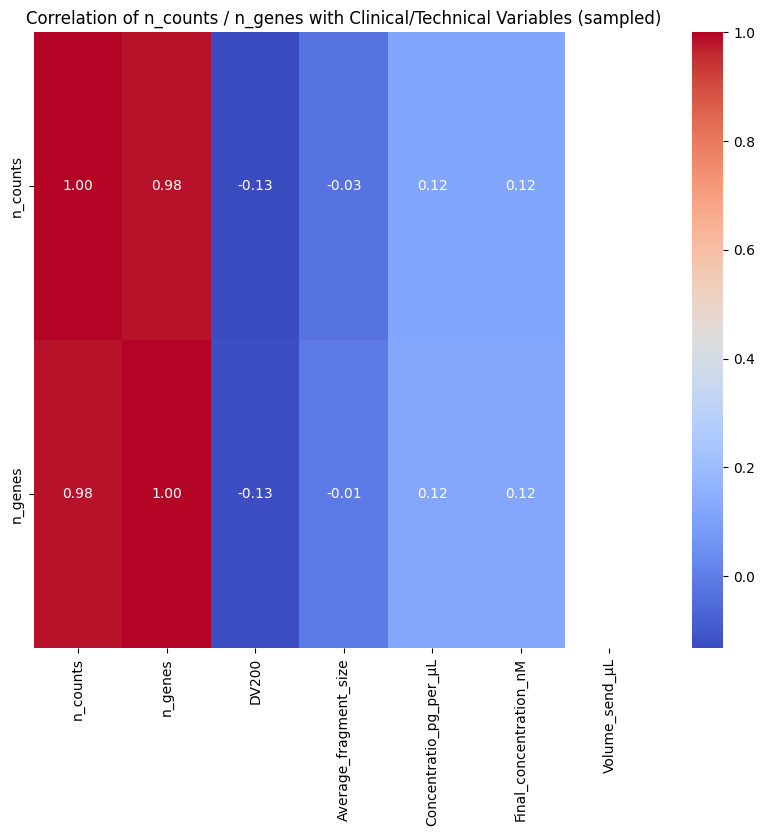

In [32]:
sampled_obs = adata.obs.sample(n=19060897, random_state=42)

# Select cleaned numeric clinical columns + UMI metrics
numeric_cols = [
    'n_counts', 'n_genes',
    'DV200',
    'Average_fragment_size',
    'Concentratio_pg_per_µL',
    'Concentration_finale_ng_per_µL',
    'Final_concentration_nM',
    'Volume_available_µL',
    'Volume_send_µL'
]

# Keep only available columns
cols_to_use = [col for col in numeric_cols if col in sampled_obs.columns]

bad_cols = ['Concentration_finale_ng_per_µL', 'Volume_available_µL']  # Example: update based on inspection
clean_cols = [col for col in cols_to_use if col not in bad_cols]

# Drop NA and compute correlation
corr_df = sampled_obs[clean_cols].dropna()
corr = corr_df.corr()

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr.loc[['n_counts', 'n_genes']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of n_counts / n_genes with Clinical/Technical Variables (sampled)")
plt.show()


Categorical columns to test: ['sample_id', 'Manip_Visium', 'HE_image_name', 'Cytasimage_path', 'TLS_status', 'area', 'slide', 'Dual _Index', 'Sample_code', 'Position_on_the_plaque', 'Sea_Dual_Index_TS_Set_A']


,feature,metric,p_value
0,sample_id,n_counts,0.0
1,sample_id,n_genes,0.0
2,Manip_Visium,n_counts,0.0
3,Manip_Visium,n_genes,0.0
4,HE_image_name,n_counts,0.0
5,HE_image_name,n_genes,0.0
6,Cytasimage_path,n_counts,0.0
7,Cytasimage_path,n_genes,0.0
8,TLS_status,n_counts,0.0
9,TLS_status,n_genes,0.0


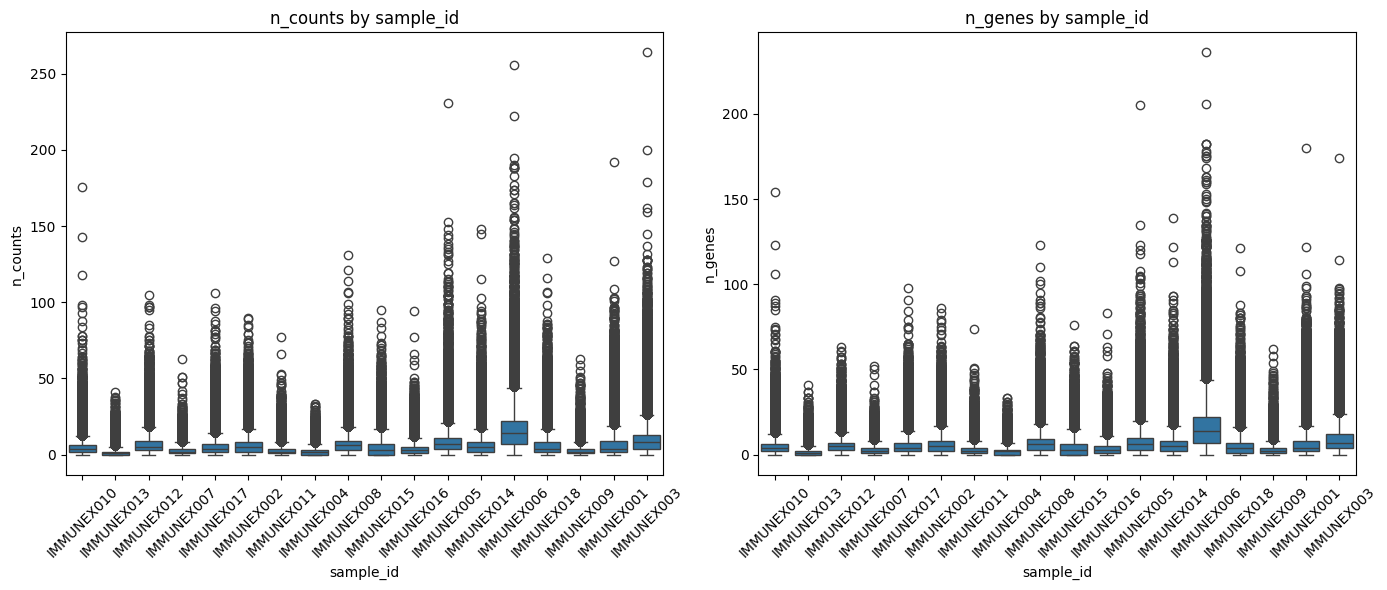

In [33]:
# Get categorical columns (non-numeric, with few unique values)
categorical_cols = [col for col in sampled_obs.columns 
                    if sampled_obs[col].dtype == 'object' 
                    and sampled_obs[col].nunique() > 1 
                    and sampled_obs[col].nunique() < 30]  # Avoid free-text columns

print("Categorical columns to test:", categorical_cols)

from scipy.stats import kruskal
import pandas as pd

results = []

for col in categorical_cols:
    for metric in ['n_counts', 'n_genes']:
        groups = sampled_obs[[col, metric]].dropna().groupby(col)[metric].apply(list)
        if len(groups) > 1:
            stat, p = kruskal(*groups)
            results.append({'feature': col, 'metric': metric, 'p_value': p})

results_df = pd.DataFrame(results).sort_values('p_value')
display(results_df.head(10))

import seaborn as sns
import matplotlib.pyplot as plt

# Pick one of the top features
top_feature = results_df.iloc[0]['feature']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=sampled_obs, x=top_feature, y='n_counts', ax=axs[0])
axs[0].set_title(f'n_counts by {top_feature}')
axs[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=sampled_obs, x=top_feature, y='n_genes', ax=axs[1])
axs[1].set_title(f'n_genes by {top_feature}')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [38]:
sampled_obs = adata.obs.sample(n=1000000, random_state=42)
sampled_obs.head()

,sample_id,batch,Manip_Visium,DV200,HE_image_name,Cytasimage_path,TLS_status,area,slide,Average_fragment_size,...,Concentration finale (ng/µL),Final_concentration_nM,Dual _Index,Volume_available_µL,Volume_send_µL,Sample_code,Position_on_the_plaque,Sea_Dual_Index_TS_Set_A,n_counts,n_genes
105588670,IMMUNEX010,010,NJ302,54,IMMUNEX010_Visium_HE_20_x20_z0.tif,assay_CAVG10047_NJ302_18dec2024_H1-GQR9ZW7_173...,Low,D1,H1-GQR9ZW7,261,...,15.4,89.0,D5,around_24,22,IMMUNEX010,B2,"SI-TS-D5,ACACAGACAA,AGACGCGCTA,TAGCGCGTCT",13.0,13
133321070,IMMUNEX013,013,NJ308,47,IMMUNEX013_Visium_HE_x40_z0.tif,assay_CAVG10047_2025-01-17_10-06-14_H1-ZVHB79P...,High,D1,H1-ZVHB79P,256,...,4.3,25.3,D6,around_24,22,IMMUNEX013,E2,"SI-TS-D6,ACTAAATGGG,ACAAATCTGT,ACAGATTTGT",0.0,0
128083482,IMMUNEX012,012,NJ306,43,IMMUNEX012_Visium_HE_x40_z0.tif,assay_CAVG10047_NJ306_15janv2025_H1-NCFHZKX_17...,High,A1,H1-NCFHZKX,255,...,6.3,37.4,E5,around_24,22,IMMUNEX012,D2,"SI-TS-E5,CGATGCCCAA,AGTGGACTTA,TAAGTCCACT",0.0,0
65545358,IMMUNEX007,007,NJ300,58,IMMUNEX007_Visium_HE_x40_z0.tif,assay_CAVG10047_NJ300-13122024_H1-7XZMWTP_1734...,High,D1,H1-7XZMWTP,258,...,9.1,53.3,A5,around_24,22,IMMUNEX007,G1,"SI-TS-A5,CTCAGCGGGA,TTACGGATAA,TTATCCGTAA",4.0,4
66202951,IMMUNEX007,007,NJ300,58,IMMUNEX007_Visium_HE_x40_z0.tif,assay_CAVG10047_NJ300-13122024_H1-7XZMWTP_1734...,High,D1,H1-7XZMWTP,258,...,9.1,53.3,A5,around_24,22,IMMUNEX007,G1,"SI-TS-A5,CTCAGCGGGA,TTACGGATAA,TTATCCGTAA",0.0,0


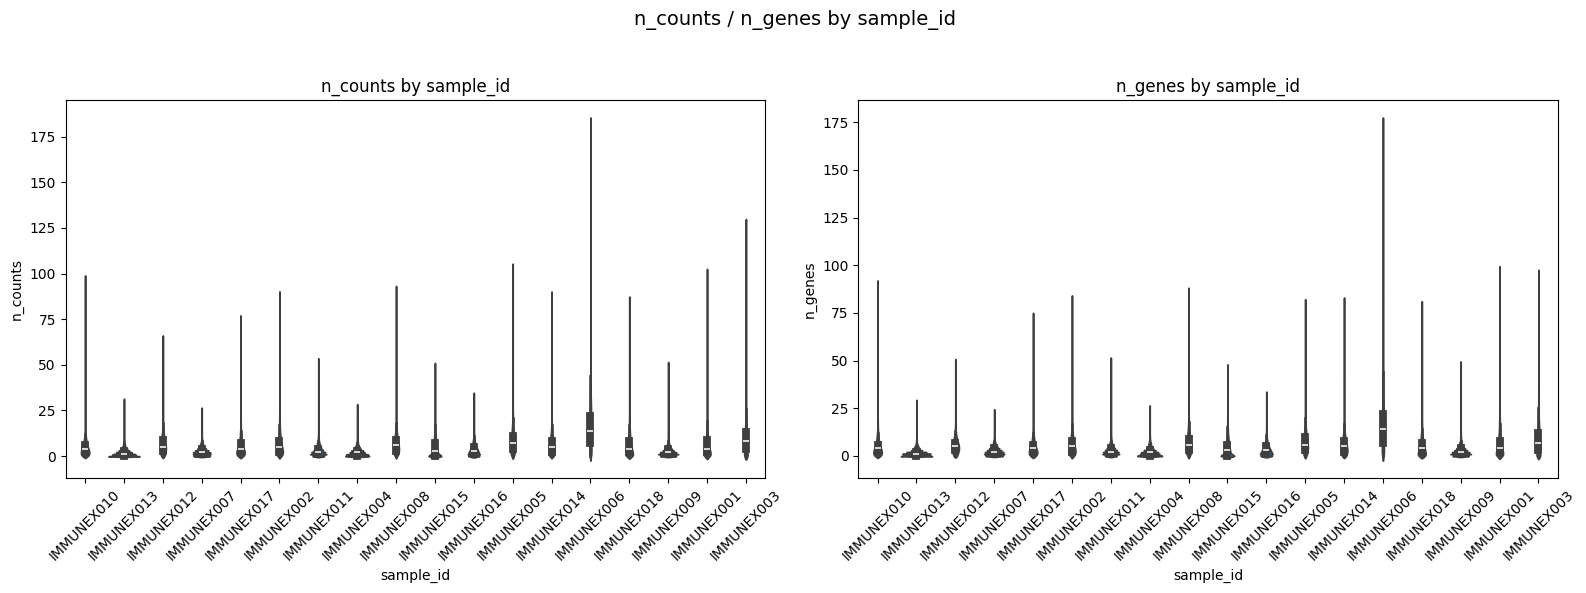

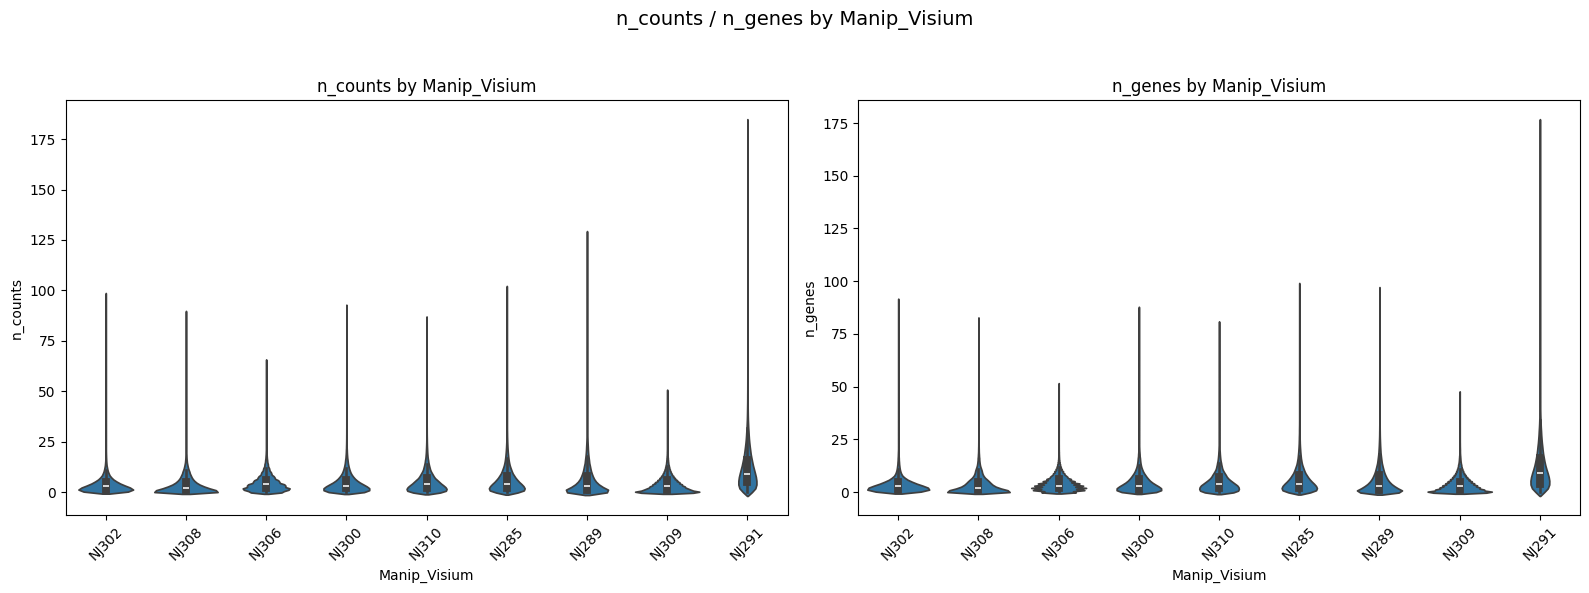

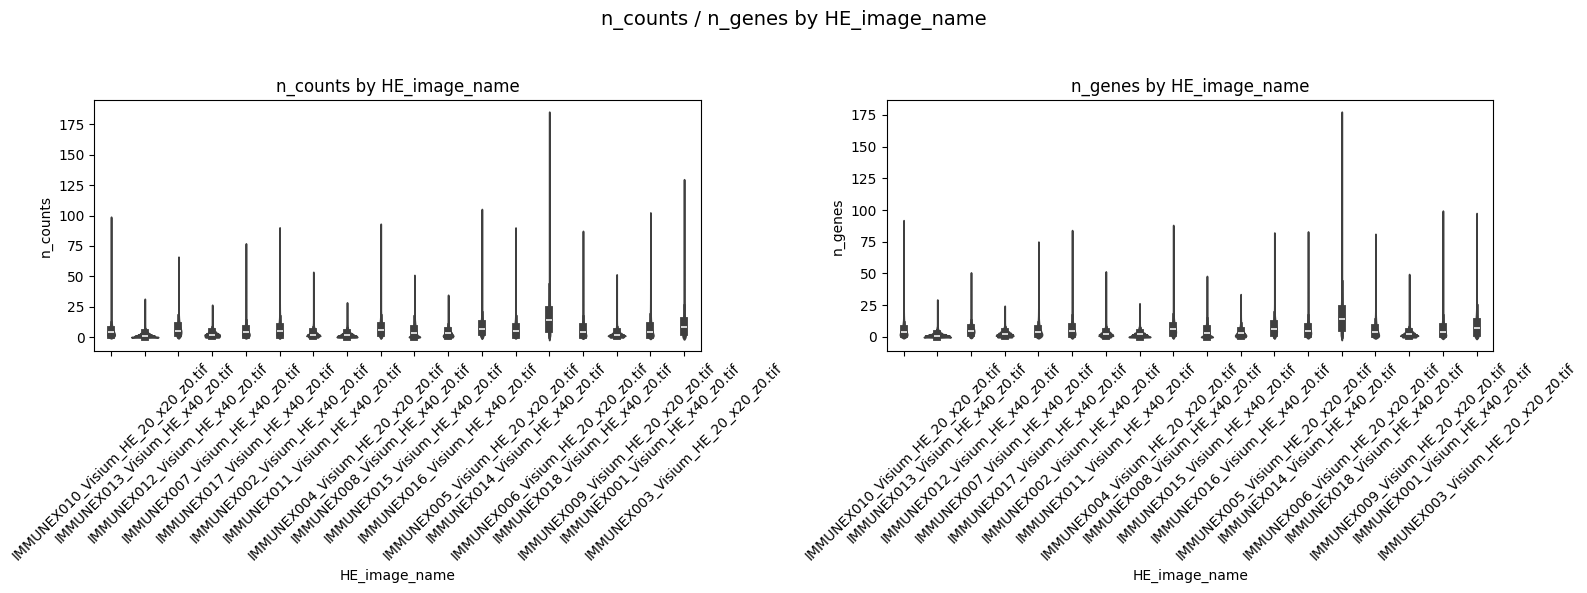

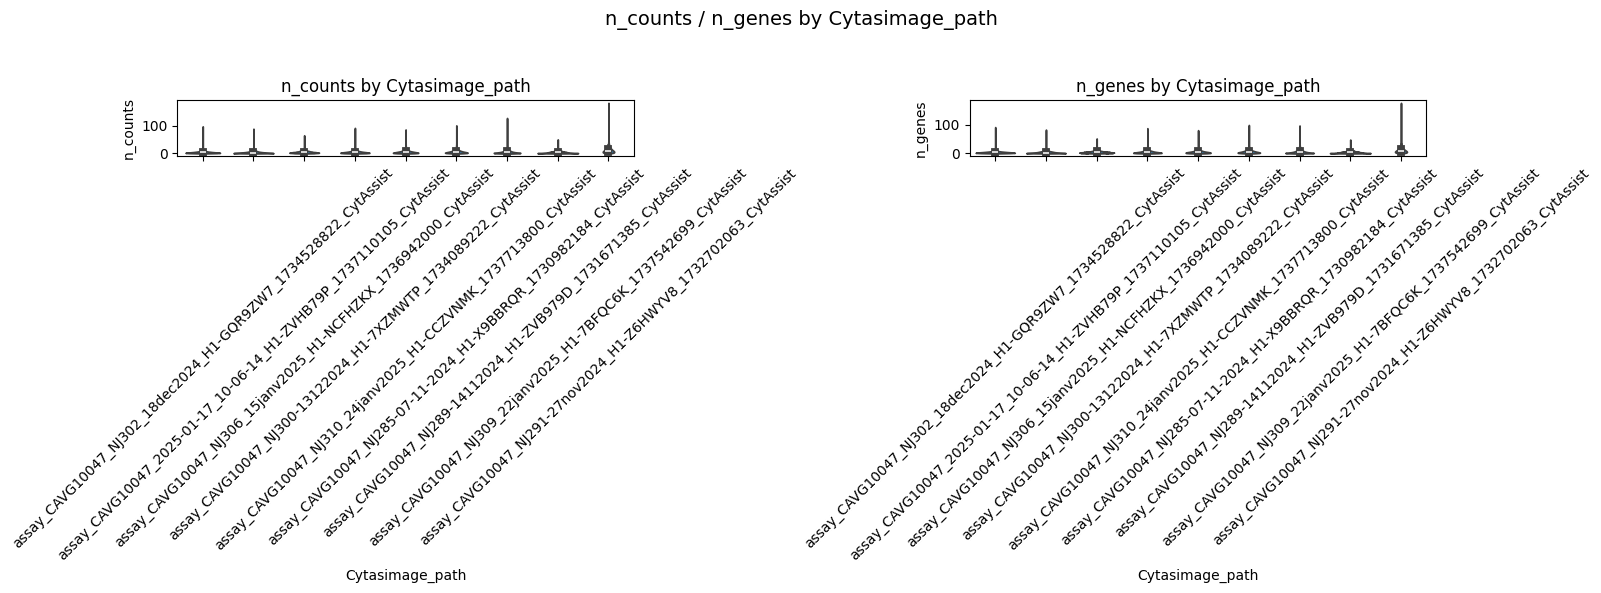

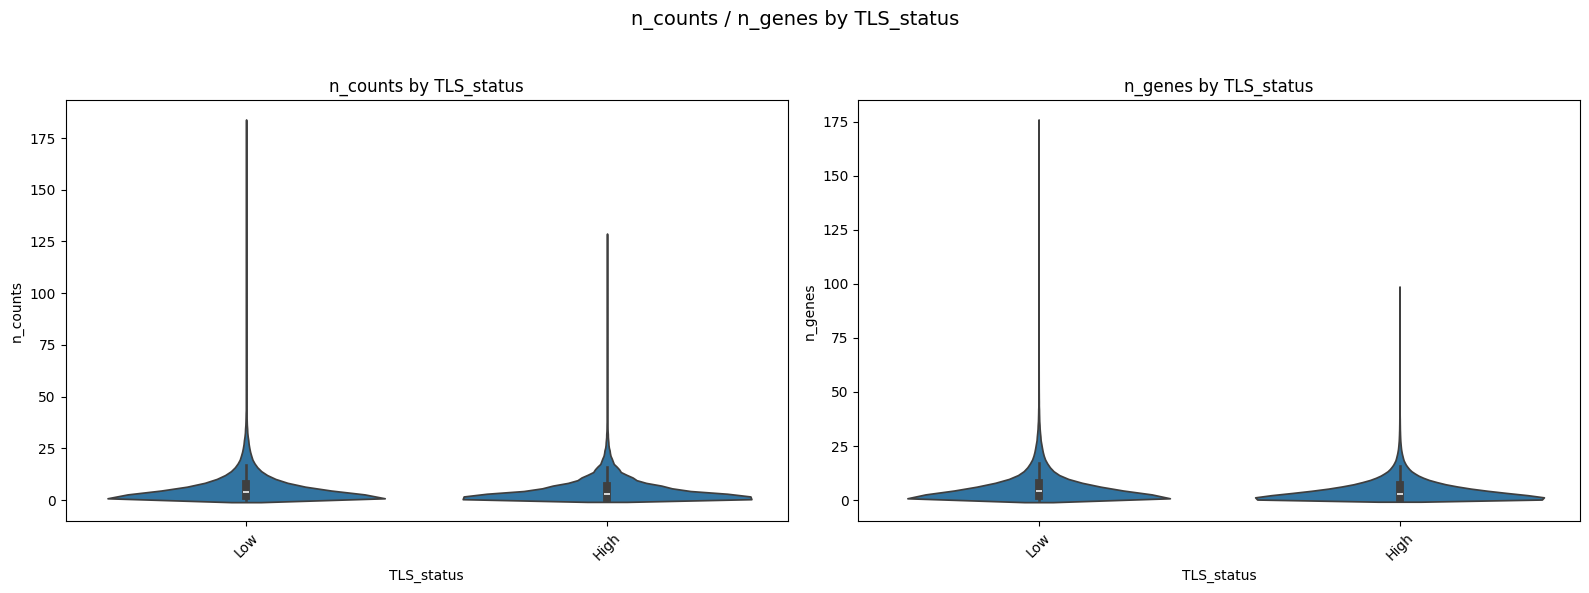

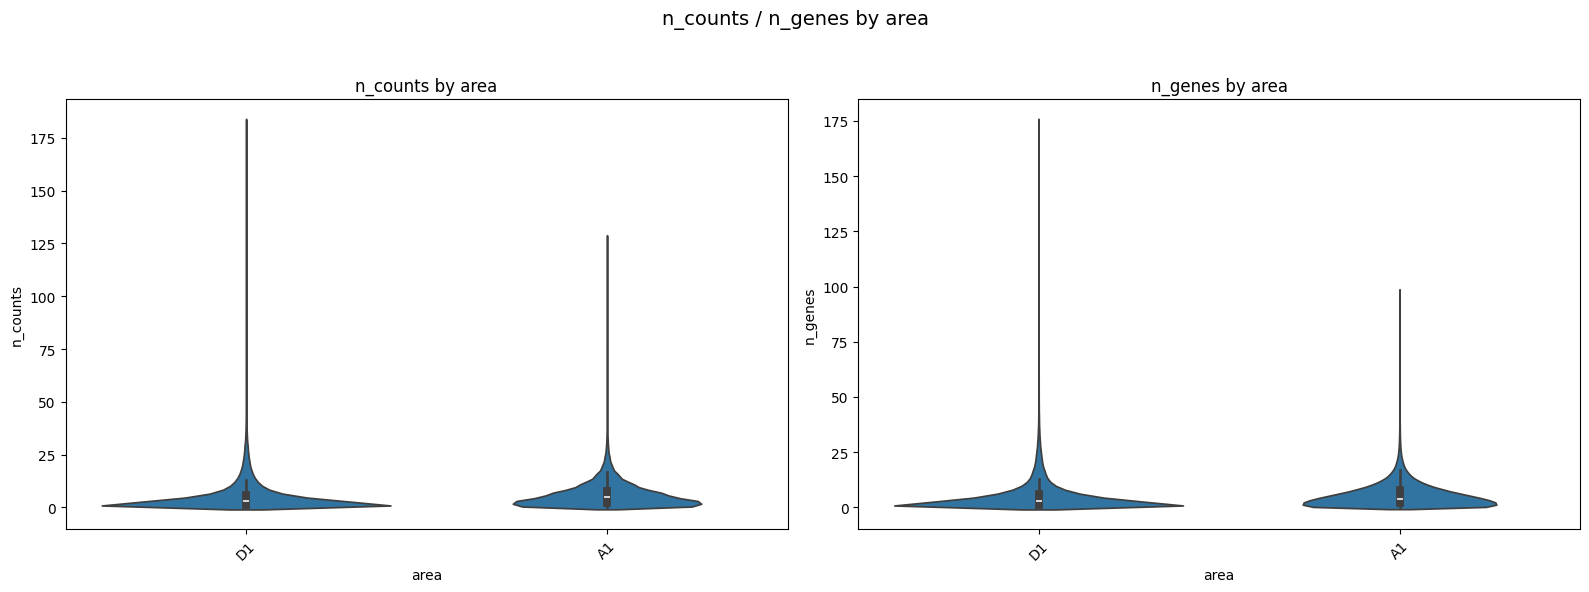

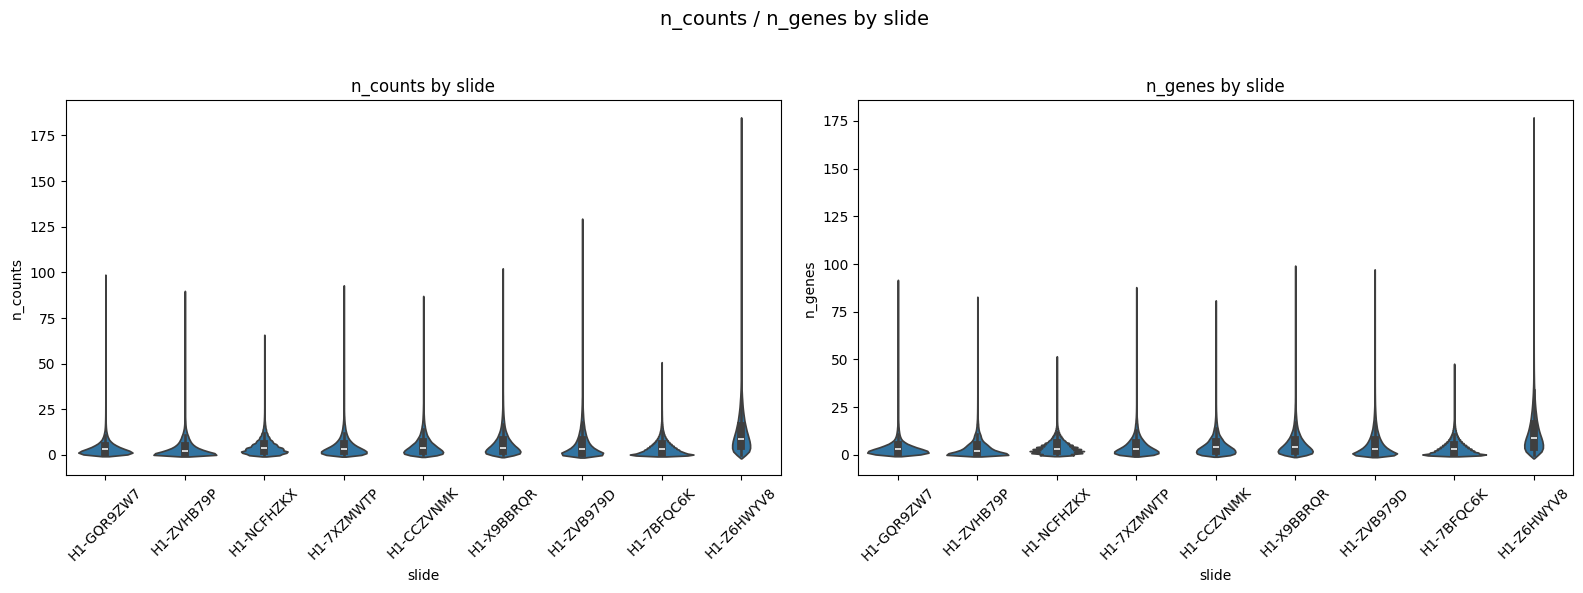

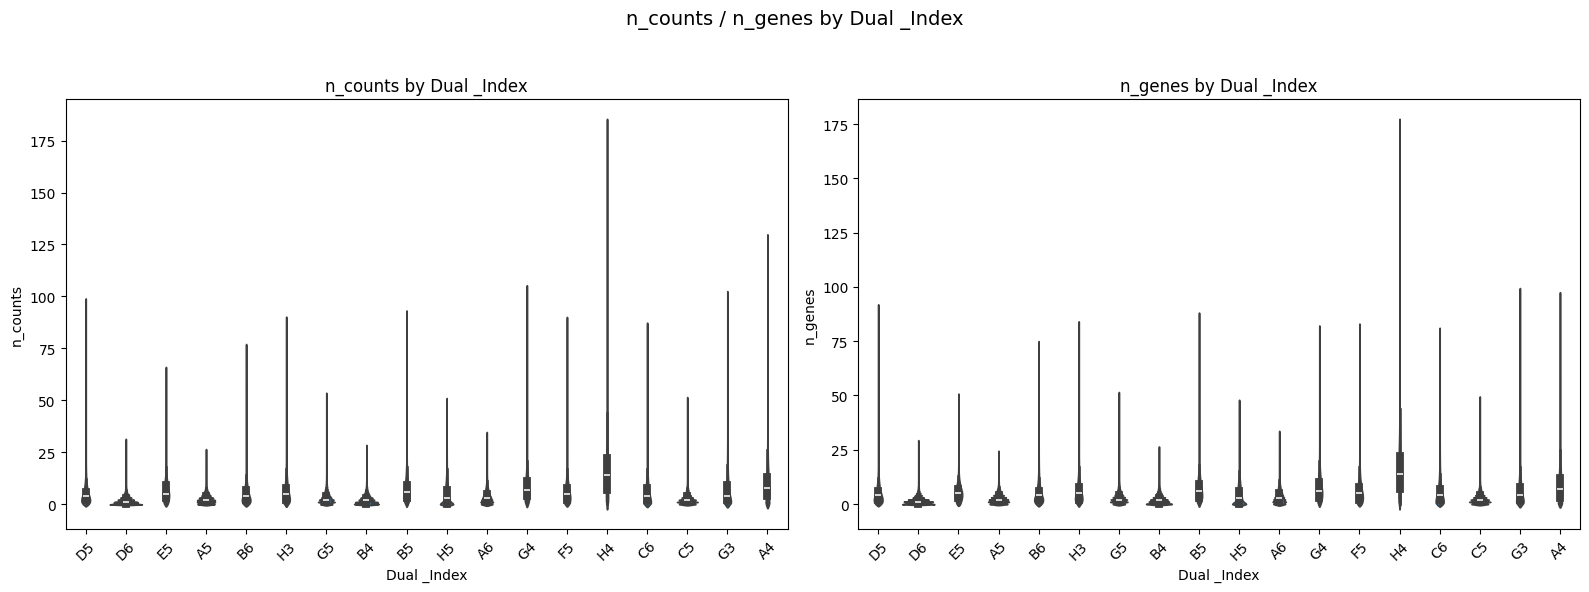

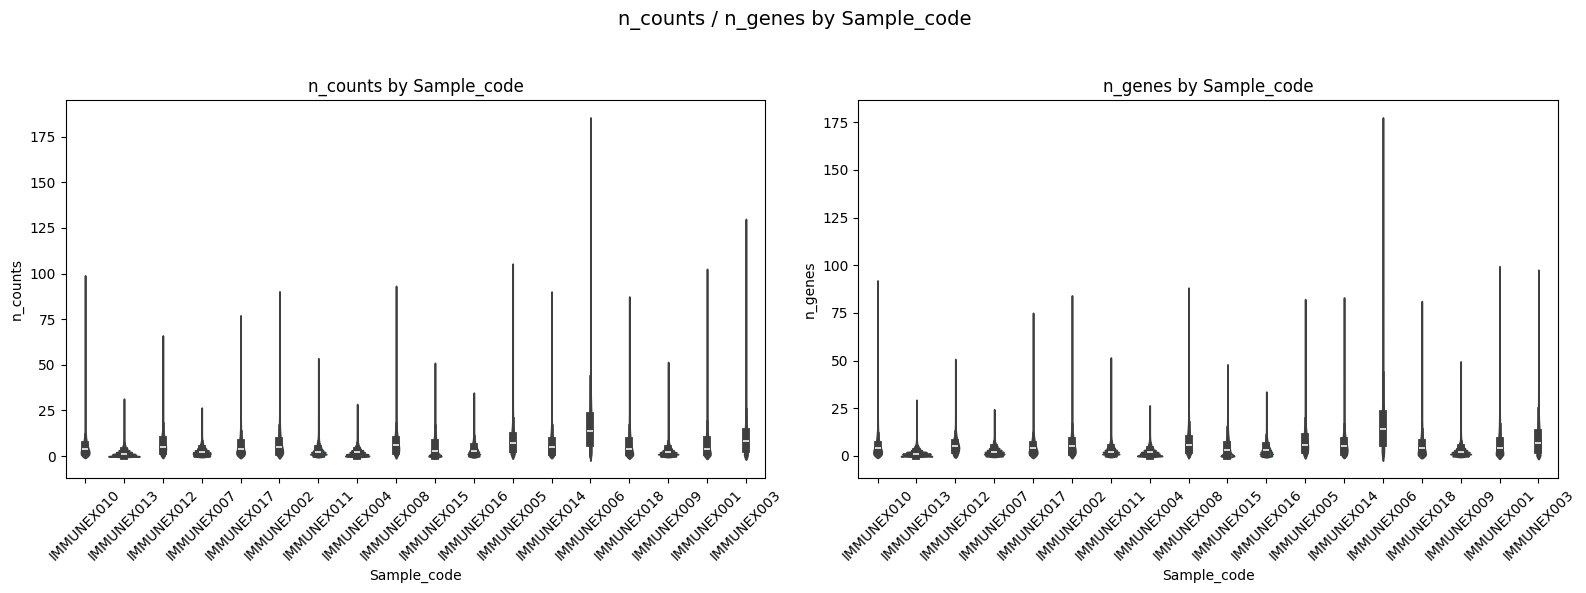

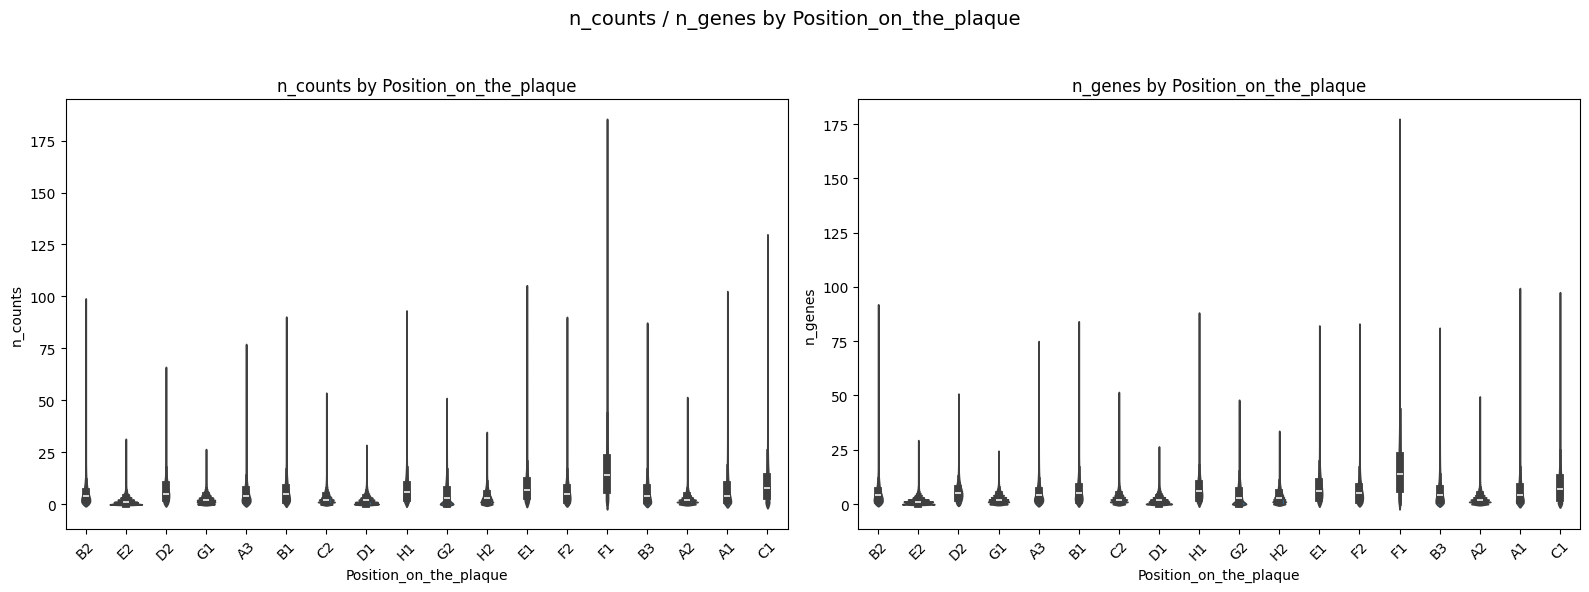

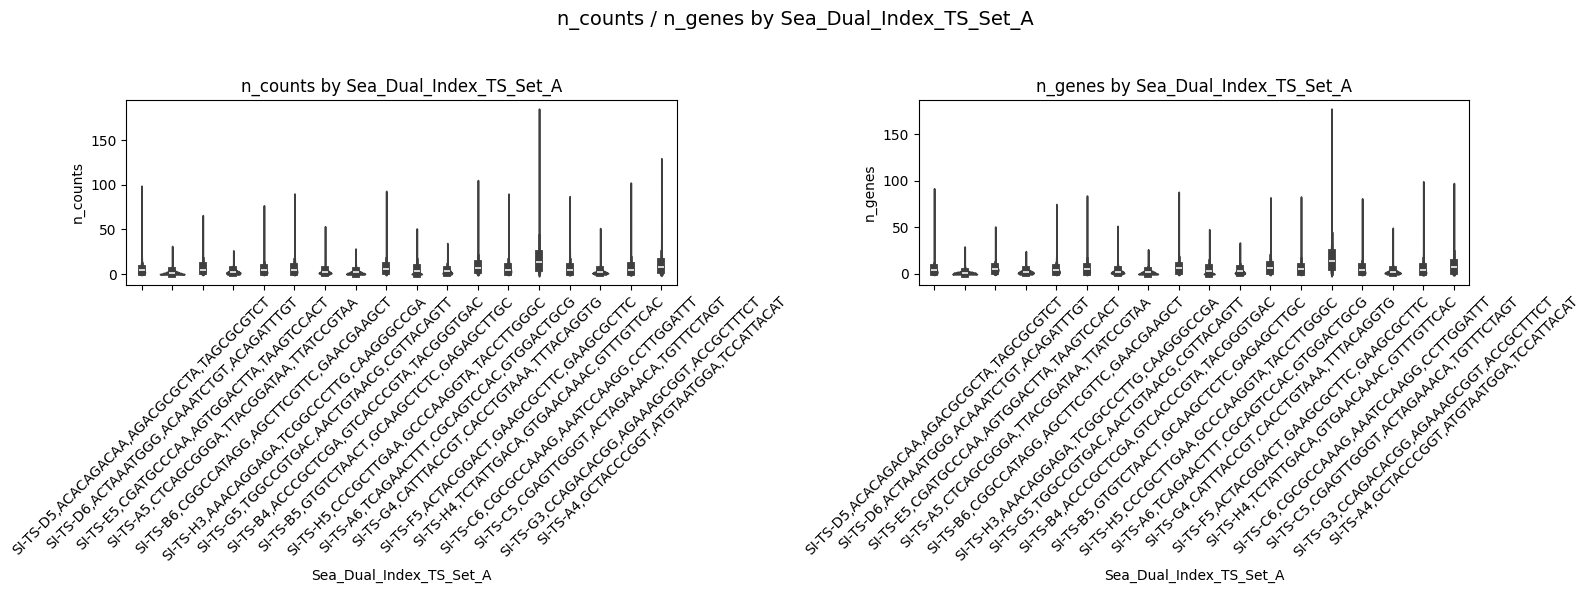

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the previously sampled subset
# (Make sure this exists — if not, run: sampled_obs = adata.obs.sample(n=10000, random_state=42))

# Select categorical variables with 2–30 unique values
categorical_cols = [
    col for col in sampled_obs.columns 
    if sampled_obs[col].dtype == 'object' 
    and 1 < sampled_obs[col].nunique() < 30
]

# Loop through categorical variables and plot violin plots
for cat_var in categorical_cols:
    subset = sampled_obs[[cat_var, 'n_counts', 'n_genes']].dropna()

    # Skip if any category has very few samples
    if subset[cat_var].value_counts().min() < 10:
        continue

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    
    sns.violinplot(data=subset, x=cat_var, y='n_counts', ax=axs[0], inner='box')
    axs[0].set_title(f'n_counts by {cat_var}')
    axs[0].tick_params(axis='x', rotation=45)
    
    sns.violinplot(data=subset, x=cat_var, y='n_genes', ax=axs[1], inner='box')
    axs[1].set_title(f'n_genes by {cat_var}')
    axs[1].tick_params(axis='x', rotation=45)

    plt.suptitle(f"n_counts / n_genes by {cat_var}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


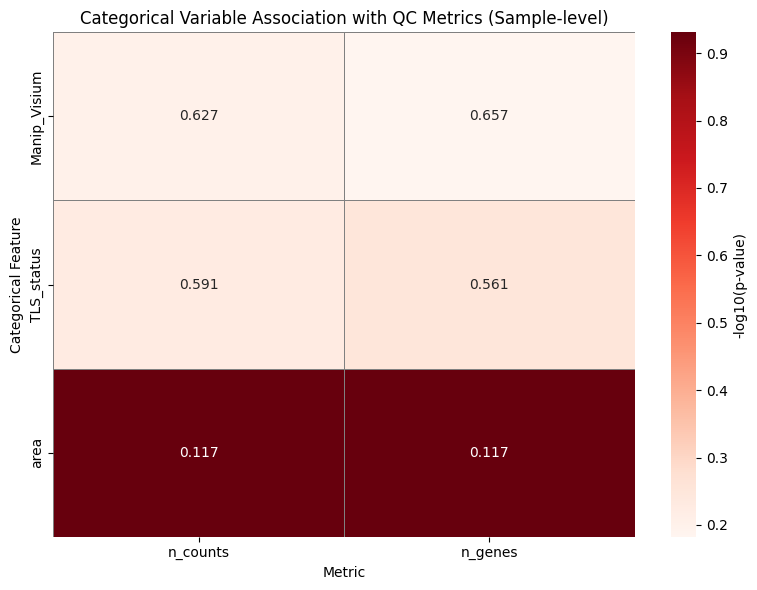

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------
# STEP 1: Aggregate per-sample median QC metrics
# ---------------------------------------------

sample_level = adata.obs.groupby('sample_id').agg({
    'n_counts': 'median',
    'n_genes': 'median'
}).reset_index()

# Merge clinical data (make sure column names match)
clinical_df.columns = clinical_df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
sample_level = sample_level.merge(clinical_df.drop_duplicates('sample_id'), on='sample_id', how='left')

# ---------------------------------------------
# STEP 2: Identify usable categorical variables
# ---------------------------------------------

metrics = ['n_counts', 'n_genes']
# Define known ID-like columns to exclude
id_like_cols = [
    'sample_id', 'HE_image_name', 'Cytasimage_path',
    'Sample_code', 'Position_on_the_plaque',
    'Sea_Dual_Index_TS_Set_A', 'Dual__Index'
]

categorical_cols = [
    col for col in sample_level.columns
    if sample_level[col].dtype == 'object'
    and 1 < sample_level[col].nunique() < 30
    and not any(x in col.lower() for x in ['id', 'name', 'code', 'path'])
    and col not in id_like_cols
]


# ---------------------------------------------
# STEP 3: Run Kruskal-Wallis test
# ---------------------------------------------

results = []

for cat in categorical_cols:
    row = {'feature': cat}
    for metric in metrics:
        try:
            df = sample_level[[cat, metric]].dropna()
            groups = df.groupby(cat)[metric].apply(list)
            if len(groups) > 1:
                stat, p = kruskal(*groups)
                row[metric] = p
            else:
                row[metric] = np.nan
        except Exception:
            row[metric] = np.nan
    results.append(row)

# Create DataFrame
pval_df = pd.DataFrame(results).set_index('feature')
pval_df = pval_df.dropna(how='all')

# ---------------------------------------------
# STEP 4: Transform and Plot
# ---------------------------------------------

log_pval_df = -np.log10(pval_df)
log_pval_df.replace([np.inf, -np.inf], np.nan, inplace=True)

plt.figure(figsize=(8, max(6, len(log_pval_df) * 0.4)))
sns.heatmap(
    log_pval_df,
    annot=pval_df.round(3),
    fmt="",
    cmap="Reds",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': '-log10(p-value)'}
)
plt.title("Categorical Variable Association with QC Metrics (Sample-level)")
plt.xlabel("Metric")
plt.ylabel("Categorical Feature")
plt.tight_layout()
plt.show()


# Compare segmentations results (GEx / HE / Expand)

In [ ]:
sampled_obs = adata.obs.sample(n=100000, random_state=42)  # adjust n as needed
sampled_obs = adata.obs
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=sampled_obs, x='labels_joint_source',  hue='labels_joint_source', order=sampled_obs['labels_joint_source'].value_counts().index)
plt.title("Segmentation Label Source Distribution (Sampled)")
plt.xlabel("Label Source")
plt.ylabel("Bin Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_163096/4025329643.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_obs.groupby(['sample_id', 'labels_joint_source'])


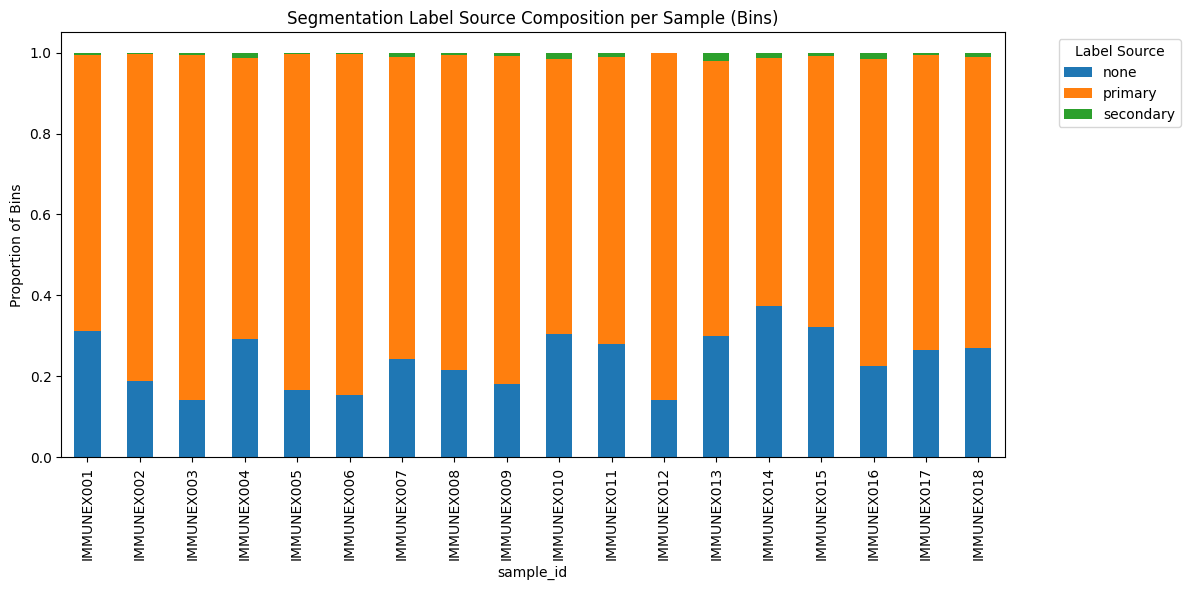

In [35]:
# Count bins per sample and label source
label_dist = (
    sampled_obs.groupby(['sample_id', 'labels_joint_source'])
    .size()
    .reset_index(name='count')
)

# Normalize to get proportions
label_dist['prop'] = label_dist.groupby('sample_id')['count'].transform(lambda x: x / x.sum())

# Plot as stacked bar (percentage)
pivot = label_dist.pivot(index='sample_id', columns='labels_joint_source', values='prop').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel("Proportion of Bins")
plt.title("Segmentation Label Source Composition per Sample (Bins)")
plt.legend(title='Label Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipykernel_163096/1352227716.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_sources.groupby(['sample_id', 'labels_joint_source'])


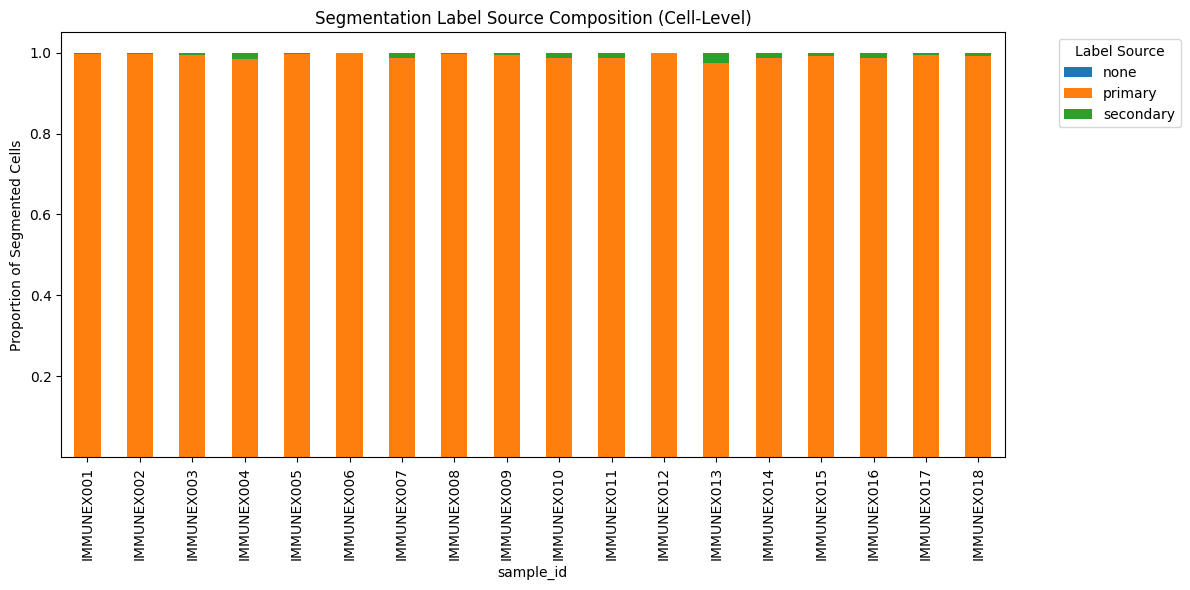

In [38]:
# Filter out background if needed
filtered = sampled_obs[sampled_obs['labels_joint'] > 0]
filtered = sampled_obs[sampled_obs['labels_joint'] > 0]

# Drop duplicates to count one row per cell (per sample)
cell_sources = filtered.drop_duplicates(['sample_id', 'labels_joint'])

# Count number of unique cells per source per sample
cell_counts = (
    cell_sources.groupby(['sample_id', 'labels_joint_source'])
    .size()
    .reset_index(name='count')
)

# Normalize to proportions per sample
cell_counts['prop'] = cell_counts.groupby('sample_id')['count'].transform(lambda x: x / x.sum())

# Pivot and plot
pivot_cells = cell_counts.pivot(index='sample_id', columns='labels_joint_source', values='prop').fillna(0)

pivot_cells.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel("Proportion of Segmented Cells")
plt.title("Segmentation Label Source Composition (Cell-Level)")
plt.legend(title='Label Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [162]:
filtered.loc[ (filtered['labels_he']!=0) | (filtered['labels_he']!=0) ]

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,...,Concentratio_pg_per_µL,Concentration finale (ng/µL),Final_concentration_nM,Dual _Index,Volume_available_µL,Volume_send_µL,Sample_code,Position_on_the_plaque,Sea_Dual_Index_TS_Set_A,n_genes
0,1,2587,2503,12.195529,0.369561,12.195529,290012,290012,42453,290012,...,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT",16
2,1,2498,2808,10.617562,0.321744,10.617562,269059,269059,0,269059,...,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT",6
5,1,2801,409,1.782101,0.054003,1.782101,365445,365445,0,365445,...,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT",3
12,1,792,3205,16.462194,0.498854,16.462194,4721,4721,0,4721,...,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT",8
14,1,299,2904,21.203689,0.722853,23.854151,22217,22217,0,22217,...,46.6,2.33,14.0,G3,around_24,22,IMMUNEX001,A1,"SI-TS-G3,CCAGACACGG,AGAAAGCGGT,ACCGCTTTCT",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166002038,1,1177,343,11.832391,0.438237,11.832391,170351,170351,0,170351,...,213.6,10.70,64.1,C6,around_24,22,IMMUNEX018,B3,"SI-TS-C6,CGCGCCAAAG,AAATCCAAGG,CCTTGGATTT",18
166002052,1,724,3205,12.762542,0.472687,12.762542,352996,352996,45386,352996,...,213.6,10.70,64.1,C6,around_24,22,IMMUNEX018,B3,"SI-TS-C6,CGCGCCAAAG,AAATCCAAGG,CCTTGGATTT",3
166002054,1,737,2776,10.941408,0.405237,10.941408,378511,378511,44137,378511,...,213.6,10.70,64.1,C6,around_24,22,IMMUNEX018,B3,"SI-TS-C6,CGCGCCAAAG,AAATCCAAGG,CCTTGGATTT",5
166002055,1,1498,1467,15.847222,0.586934,15.847222,201151,201151,0,201151,...,213.6,10.70,64.1,C6,around_24,22,IMMUNEX018,B3,"SI-TS-C6,CGCGCCAAAG,AAATCCAAGG,CCTTGGATTT",16


/tmp/ipykernel_163096/63434960.py:18: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=bins_per_cell, x='sample_id', y='bins_per_cell', inner='box', scale='width')


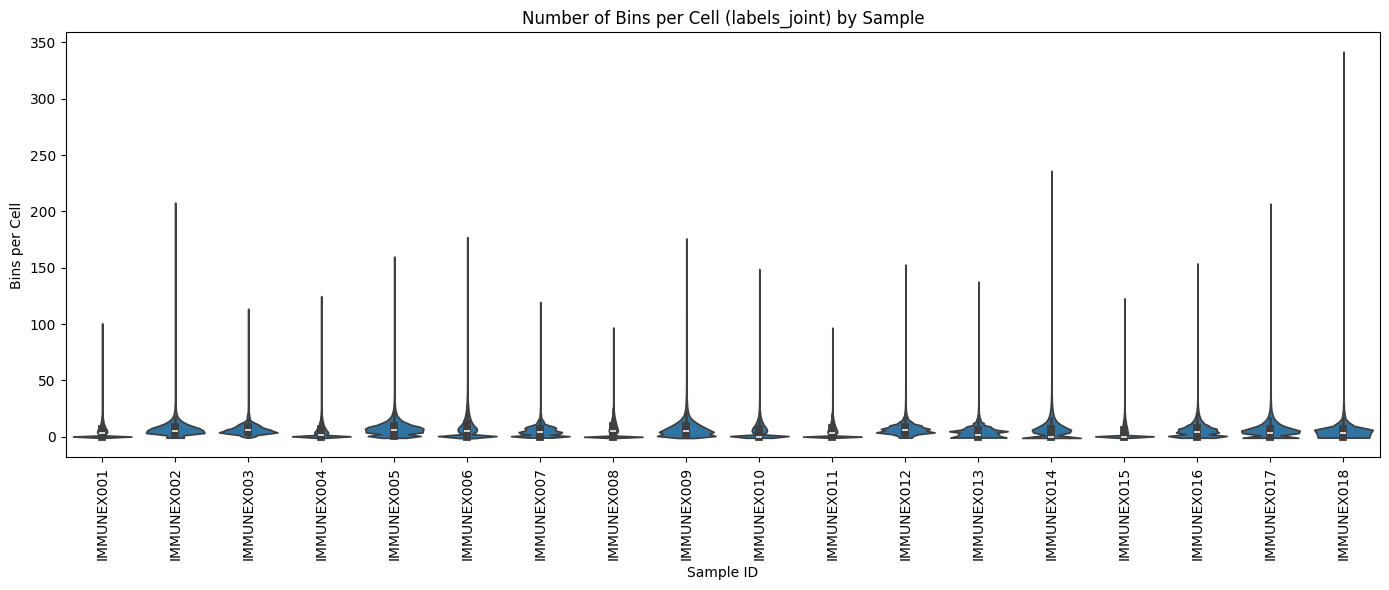

In [168]:
## number of bins per segmented cell 

# Filter out background (usually label 0 means no cell)
filtered = sampled_obs[sampled_obs['labels_joint'] > 0]
filtered = filtered[filtered['labels_joint_source'] != 'none']
filtered = filtered.loc[ (filtered['labels_he']!=0) | (filtered['labels_he']!=0) ]

# Count bins per segmented cell per sample
bins_per_cell = (
    filtered.groupby(['sample_id','labels_joint','labels_joint_source'])
    .size()
    .reset_index(name='bins_per_cell')
)

bins_per_cell = bins_per_cell.loc[bins_per_cell['labels_joint_source']=='primary']

plt.figure(figsize=(14, 6))
sns.violinplot(data=bins_per_cell, x='sample_id', y='bins_per_cell', inner='box', scale='width')
plt.xticks(rotation=90)
plt.title("Number of Bins per Cell (labels_joint) by Sample")
plt.ylabel("Bins per Cell")
plt.xlabel("Sample ID")
plt.tight_layout()
plt.show()


### inspect cells with + bins

In [169]:
cell_by_size = bins_per_cell.sort_values("bins_per_cell", ascending=False)
cell_by_size

,sample_id,labels_joint,labels_joint_source,bins_per_cell
33061123,IMMUNEX018,275406,primary,341
25293721,IMMUNEX014,214500,primary,235
1939810,IMMUNEX002,14547,primary,207
30661669,IMMUNEX017,107645,primary,206
31285324,IMMUNEX017,315530,primary,184
...,...,...,...,...
7272043,IMMUNEX004,527845,primary,0
7272040,IMMUNEX004,527844,primary,0
7272037,IMMUNEX004,527843,primary,0
7272034,IMMUNEX004,527842,primary,0


In [170]:
# Find cell (labels_joint) with the most bins
largest_cell = bins_per_cell.sort_values("bins_per_cell", ascending=False).iloc[0]
sample_id = largest_cell['sample_id']
cell_label = largest_cell['labels_joint']
print(f"Largest cell is in sample {sample_id} with label {cell_label} spanning {largest_cell['bins_per_cell']} bins.")


Largest cell is in sample IMMUNEX018 with label 275406 spanning 341 bins.


In [171]:
import squidpy as sq

# Get matching rows from adata
adata_cell = adata[adata.obs['sample_id'] == sample_id].copy()

# Select only bins for that cell
mask = adata_cell.obs['labels_joint'] == cell_label
adata_cell.obs['highlight'] = mask.astype(int)  # 1 = target cell, 0 = rest
print('adata_cell :',adata_cell.shape)

# Full image
# sq.pl.spatial_scatter(
#     adata_cell,
#     color='highlight',
#     size=5,
#     cmap='coolwarm',
#     title=f"Largest Cell in {sample_id} (label: {cell_label})",
#     library_id=sample_id  # assuming you subset to a single sample
# )


adata_cell : (8521636, 16521)


In [187]:
# # Full image
# sq.pl.spatial_scatter(
#     adata_cell,
#     color='highlight',
#     size=5,
#     cmap='coolwarm',
#     title=f"Largest Cell in {sample_id} (label: {cell_label})",
#     library_id=sample_id  # assuming you subset to a single sample
# )

In [175]:
adata_cell.obs['isExpanded'] = ( adata_cell.obs['labels_he'] == 0 ) & ( adata_cell.obs['labels_he_expanded'] != 0 )
adata_cell.obs['isExpanded'] = adata_cell.obs['isExpanded'].astype('int')
adata_cell.obs['Highlight | Expand'] = adata_cell.obs['highlight'].astype('str') + ' | ' +  adata_cell.obs['isExpanded'].astype('str')
adata_cell.obs.head()

,in_tissue,array_row,array_col,n_counts,destripe_factor,n_counts_adjusted,labels_he,labels_he_expanded,labels_gex,labels_joint,labels_joint_source,sample_id,n_genes,highlight,isExpanded,Highlight | Expand
s_002um_00658_01498-1,1,658,1498,3.245412,0.120200,3.245412,0,310010,0,310010,primary,IMMUNEX018,2,0,1,0 | 1
s_002um_02587_02503-1,1,2587,2503,4.013161,0.148636,4.013161,121411,121411,14895,121411,primary,IMMUNEX018,2,0,0,0 | 0
s_002um_01674_00710-1,1,1674,710,1.286655,0.047654,1.286655,0,0,0,0,none,IMMUNEX018,1,0,0,0 | 0
s_002um_00564_00910-1,1,564,910,2.090813,0.077438,2.090813,0,0,37214,0,none,IMMUNEX018,1,0,0,0 | 0
s_002um_02801_00409-1,1,2801,409,9.858812,0.365141,9.858812,0,0,0,0,none,IMMUNEX018,10,0,0,0 | 0


In [174]:
adata_cell.obs['highlight'].value_counts()

highlight
0    8521207
1        429
Name: count, dtype: int64

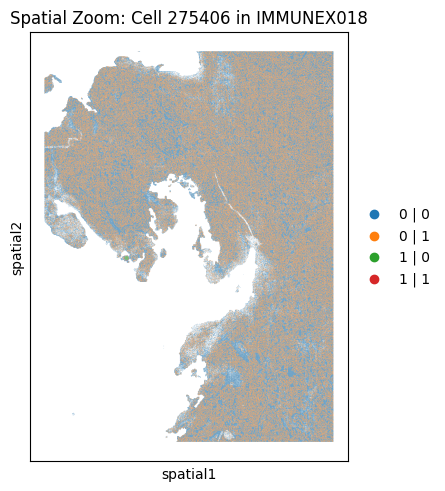

In [188]:
# 1. Crop adata_cell based on array coordinates (no image needed)
padding = 1000

cell_data = adata_cell.obs[adata_cell.obs['highlight'] == 1]
col_min = cell_data['array_col'].min() - padding
col_max = cell_data['array_col'].max() + padding
row_min = cell_data['array_row'].min() - padding
row_max = cell_data['array_row'].max() + padding

spatial_mask = (
    (adata_cell.obs['array_col'] >= col_min) &
    (adata_cell.obs['array_col'] <= col_max) &
    (adata_cell.obs['array_row'] >= row_min) &
    (adata_cell.obs['array_row'] <= row_max)
)

# adata_crop = adata_cell[spatial_mask].copy()

# # 2. Plot spatial scatter without image
# sq.pl.spatial_scatter(
#     adata_crop,
#     color='Highlight | Expand',
#     size=1,
#     cmap='viridis',
#     title=f"Spatial Zoom: Cell {cell_label} in {sample_id}",
#     library_id=sample_id,   # Needed even without image
#     img=None                # This disables image display
# )

In [205]:
# 1. Crop adata_cell based on array coordinates (no image needed)
padding = 200

cell_data = adata_cell.obs[adata_cell.obs['highlight'] == 1]
col_min = cell_data['array_col'].min() - padding
col_max = cell_data['array_col'].max() + padding
row_min = cell_data['array_row'].min() - padding
row_max = cell_data['array_row'].max() + padding

spatial_mask = (
    (adata_cell.obs['array_col'] >= col_min) &
    (adata_cell.obs['array_col'] <= col_max) &
    (adata_cell.obs['array_row'] >= row_min) &
    (adata_cell.obs['array_row'] <= row_max)
)
adata_crop = adata_cell[spatial_mask].copy()
adata_crop

AnnData object with n_obs × n_vars = 62475 × 16521
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'destripe_factor', 'n_counts_adjusted', 'labels_he', 'labels_he_expanded', 'labels_gex', 'labels_joint', 'labels_joint_source', 'sample_id', 'n_genes', 'highlight', 'isExpanded', 'Highlight | Expand'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial', 'spatial_cropped_150_buffer'

In [ ]:
# 2. Plot spatial scatter without image
adata_crop.obs['cell_id'] = adata_crop.obs['labels_joint'].astype('category')

sq.pl.spatial_scatter(
    adata_crop,
    color=['labels_joint_source','isExpanded','cell_id'],
    size=1,
    cmap='Set1',
    title=f"Spatial Zoom: Cell {cell_label} in {sample_id}",
    library_id=sample_id,   # Needed even without image
    img=None                # This disables image display
)

In [ ]:
# 2. Plot spatial scatter without image
adata_crop.obs['cell_id'] = adata_crop.obs['labels_joint'].astype('category')

sq.pl.spatial_scatter(
    adata_crop,
    color=['highlight'],
    alpha=1,
    size=1,
    # cmap='Set1',
    title=f"Spatial Zoom: Cell {cell_label} in {sample_id}",
    figsize=(300, 300) ,
    library_id=sample_id, 
    save='./segmentation/preview2.png'
)

KeyboardInterrupt: 

In [204]:
sample_id

'IMMUNEX018'